In [2]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir("C:/Users/sange/Documents/Python Dir")

You can download the data from here - http://faculty.marshall.usc.edu/gareth-james/ISL/data.html 

In [4]:
ad  = pd.read_csv("Advertising.csv")

In [5]:
ad.drop("Unnamed: 0", axis=1, inplace=True)
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## The Bias

**We will use Linear Regression to display bias or underfitting**

In [7]:
# Fitting Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(ad.TV.values.reshape(-1,1), ad.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(220, 1, '@DataScienceWithSan')

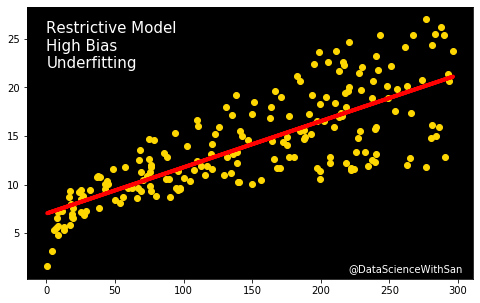

In [10]:
plt.figure(figsize=(8,5))
plt.subplot(111, facecolor='black')
plt.scatter(ad.TV, ad.Sales, color='gold')
plt.plot(ad.TV,model.predict(ad.TV.values.reshape(-1,1)),color='red',linewidth=4)
plt.text(0,22,"Restrictive Model\nHigh Bias\nUnderfitting", color='white',size=15)
plt.text(220,1,"@DataScienceWithSan", color='white')

Simple Linear Regression is an inflexible model that assumes a linear relationship between input and output variables. This assumption, approximation, and restriction introduce **bias** to this model.

*Hence bias refers to the error which is observed while approximating a complex problem using a simple (or restrictive) model.*

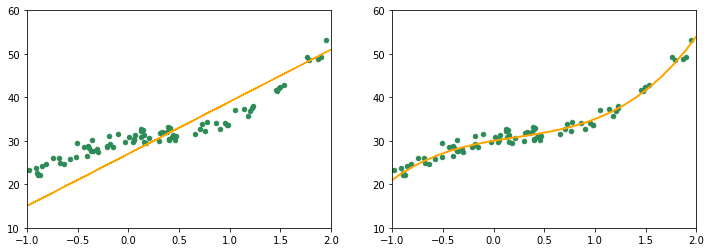

In [13]:
# Generating random data
np.random.seed(0)
x = np.random.normal(0,1,100)
y = 30 + 4*x - 2*(x**2) + 3*(x**3) + np.random.normal(0,1,100)
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.ylim(10,60)
plt.xlim(-1,2)
plt.scatter(x,y,s=20,c='seagreen')
plt.plot(x, 27+12*x, color='orange', linewidth=1)

plt.subplot(122)
plt.ylim(10,60)
plt.xlim(-1,2)
plt.scatter(x,y,s=20,c='seagreen')
x2 = np.linspace(-3,3,50)
plt.plot(x2,30 + 4*x2 - 2*(x2**2) + 3*(x2**3), c='orange', linewidth=2)

The plot on the right is quite more flexible than the one on the left. It fits more smoothly with the data. On the other hand, the plot on the left represents a poorly fitted model, which assumes a linear relationship in data. This poor-fitting due to high bias is also known as ***underfitting***. Underfitting results in poor performance and low accuracies and can be rectified if needed by using more flexible models.

Let’s summarise the key points about bias:
* Bias is introduced when restrictive (inflexible) models are used to solve complex problems
* As the flexibility of a model increases, the bias starts decreasing for training data.
* Bias can cause underfitting, which further leads to poor performance and predictions.

## The Variance

**Performing KNN on above data to show high variance or overfitting**

Text(220, 1, '@DataScienceWithSan')

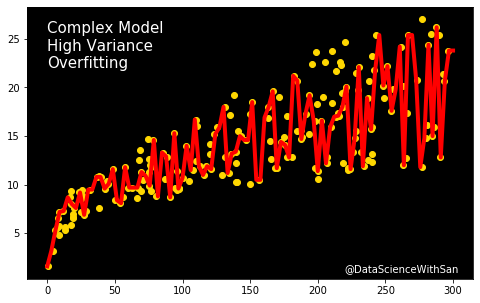

In [14]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn.fit(ad.TV.values.reshape(-1,1), ad.Sales)

x_points_ad = np.linspace(0,300,100)
y_knn_ad = knn.predict(x_points_ad.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.subplot(111, facecolor='black')
plt.scatter(ad.TV, ad.Sales, color='gold')
plt.plot(x_points_ad, y_knn_ad, color='red',linewidth=4)
plt.text(0,22,"Complex Model\nHigh Variance\nOverfitting", color='white', size=15)
plt.text(220,1,"@DataScienceWithSan", color='white')

In Machine Learning, when a model performs so well on the training dataset, that it almost memorizes every outcome, it is likely to perform quite badly when running for testing dataset.

This phenomenon is known as ***overfitting*** and is generally observed while building very complex and flexible models.

What is Variance?

***Variance is the amount by which our model will have to change if it were to make predictions on a different dataset.***

Let’s simplify the above statement → Our model should not yield high errors if we use it to estimate the outputs of unseen data. That is if the model shows good results on the training dataset, but poor results on testing, it is said to have high variance.

Hence, building a very complex model can come at the cost of overfitting. One must understand that too much learning can bring high variance.

Let’s see some of the key points about Variance.
* Variance is the amount by which a model needs changing if it were to make predictions on unseen data.
* High variance is equivalent to the overfitting of the model.
* Restrictive models such as Linear Regression show low variance, whereas more complex and flexible models can introduce high variance.

In [15]:
## Making Random Data

np.random.seed(0)
x = np.random.normal(0,10,50)
y = 0.1*x + 0.01*(x**2) + 0.01*(x**3) + np.random.normal(0,10,50)

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

Text(0.5, 1.0, 'Figure 4 - KNN with 1 nearest neighbor')

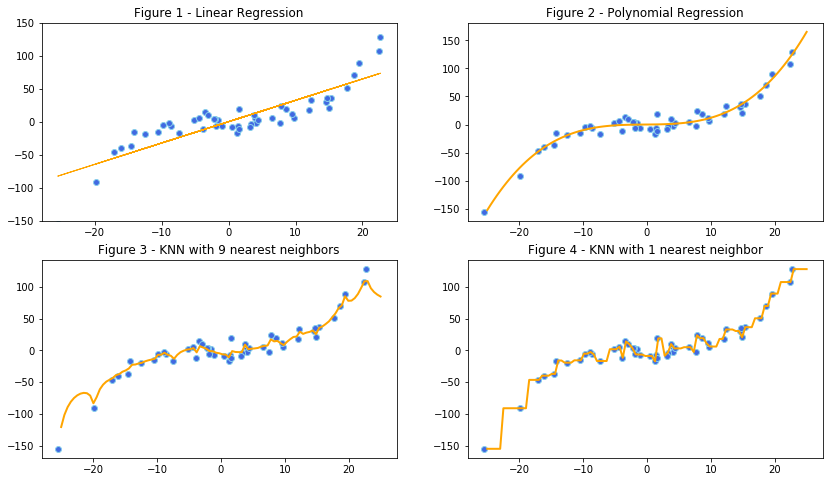

In [20]:
plt.figure(figsize=(14,8))

## Fitting and plotting Linear Regression
regression_model = LinearRegression()
regression_model.fit(x,y)
plt.subplot(221)
plt.scatter(x, y, edgecolor='skyblue',color='royalblue')
plt.plot(x,regression_model.predict(x),color='orange',linewidth=1)
plt.title("Figure 1 - Linear Regression")

#############################################################################

## Fitting and plotting polynomial regression
x_points = np.linspace(-25,25,100)
y2 =  0.1*x_points + 0.01*(x_points**2) + 0.01*(x_points**3)
plt.ylim(-150,150)
plt.subplot(222)
plt.scatter(x, y, edgecolor='skyblue',color='royalblue')
plt.plot(x_points,y2,color='orange',linewidth=2)
plt.title("Figure 2 - Polynomial Regression")

#############################################################################

## Fitting and plotting KNN with high k
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=9, weights='distance')
knn.fit(x, y)
y_knn_h = knn.predict(x_points.reshape(-1,1))
plt.subplot(223)
plt.scatter(x, y, edgecolor='skyblue', color='royalblue')
plt.plot(x_points, y_knn_h, color='orange',linewidth=2)
plt.title("Figure 3 - KNN with 9 nearest neighbors")

#############################################################################

## Fitting and plotting KNN with k=1
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
knn.fit(x, y)
y_knn_h = knn.predict(x_points.reshape(-1,1))
#plt.subplot(111,facecolor='navy')
plt.subplot(224)
plt.scatter(x, y, edgecolor='skyblue',color='royalblue' )
plt.plot(x_points, y_knn_h, color='orange', linewidth=2)
plt.title("Figure 4 - KNN with 1 nearest neighbor")

Now take a few seconds to observe these plots and see how increasing the complexity of our model to train on the same data reduces bias and underfitting, thus reducing the training error.

* Figure 1 shows the most restrictive model that is the linear model as we saw earlier. The bias in this model is certainly the highest.
* Figure 2, the polynomial regression, is a smoother curve and reduces the training error further, hence showing a somewhat lesser bias than the linear model.
* Figure 3 shows the K-Nearest Neighbors (KNN) model with K=9, which is able to classify the data more accurately than the previous two models.
* Figure 4, the KNN model with K=1, closely follows the data and hardly misclassifies any samples. It gives the least amount of bias and underfitting as compared to all the previous models, but it shows very high variance and overfitting.

## Bias Variance trade-off

It is important to keep in mind that some bias and some variance will always be there while building a Machine Learning model. Both bias and variance add to the overall error in the model.

To minimize the reducible error (bias+variance), we must find the sweet spot between the two, where both bias and variance coexist with minimum possible values. This is called Bias-Variance Trade-off. It’s more of a trade-off between Prediction Accuracy (Variance) and Model Interpretability (Bias).

Find the full article here : https://towardsdatascience.com/bias-variance-tradeoff-7ca56ba182a